In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [42]:
sample = torch.load("./test_pklfiles/10001.pkl",weights_only=False)
print(sample[0])
print(sample[0].shape)
print(sample[1])
print(sample[1]['car'])

[[  -1.64371179  -15.24869792   76.90416667 ...   29.
    27.            0.        ]
 [  -1.64371179  -15.31380208   76.94583333 ...   29.
    27.           10.        ]
 [  -1.64371179  -15.37890625   76.9875     ...   29.
    27.           20.        ]
 ...
 [   1.72080315  -15.34427083   80.67291667 ...   29.
    27.         1250.        ]
 [   1.78229559  -15.296875     80.7        ...   29.
    27.         1260.        ]
 [   1.78229559  -15.296875     80.74166667 ...   29.
    27.         1270.        ]]
(128, 8)
OrderedDict([('label', '00'), ('car', np.int64(173)), ('charge_segment', '549'), ('mileage', np.float64(1790.7288095312501))])
173


In [43]:
print(int(sample[1]['charge_segment']))
print(type(sample[1]['charge_segment']))

549
<class 'str'>


In [44]:
obj = glob("./test_pklfiles/*.pkl")
charge_segment = {}
mileage = {}
current ={}
abnormal_car = []
for s in obj:
    data = torch.load(s,weights_only=False)
    if int(data[1]['charge_segment']) not in charge_segment.keys():
        charge_segment.setdefault(int(data[1]['charge_segment']),[]).append(data[1]['car'])
    if float(data[1]['mileage']) not in mileage.keys():
        mileage.setdefault(float(data[1]['mileage']),[]).append(data[1]['car'])
    current.setdefault(data[1]['car'],[]).append(data[0][:,2])
    if(int(data[1]['label']) == 10) :
       if data[1]['car'] not in abnormal_car:
        abnormal_car.append(int(data[1]['car']))

In [46]:
for k,v in current.items():
    print(len(v))


41
38
10
27
26
55
5
25
16
14
13
2
5
5
3
2
5
4
2
1
1


In [47]:
print(charge_segment)
print(mileage)
print(max(mileage.keys()))

{629: [np.int64(187)], 209: [np.int64(195)], 62: [np.int64(187)], 170: [np.int64(195)], 155: [np.int64(187)], 21: [np.int64(192)], 346: [np.int64(180)], 78: [np.int64(180)], 231: [np.int64(195)], 249: [np.int64(188)], 310: [np.int64(170)], 503: [np.int64(180)], 122: [np.int64(168)], 142: [np.int64(172)], 340: [np.int64(173)], 305: [np.int64(170)], 489: [np.int64(188)], 285: [np.int64(170)], 289: [np.int64(170)], 66: [np.int64(198)], 436: [np.int64(167)], 93: [np.int64(188)], 655: [np.int64(187)], 217: [np.int64(172)], 213: [np.int64(190)], 98: [np.int64(175)], 272: [np.int64(180)], 11: [np.int64(176)], 433: [np.int64(172)], 111: [np.int64(198)], 549: [np.int64(173)], 75: [np.int64(190)], 63: [np.int64(169)], 228: [np.int64(185)], 351: [np.int64(168)], 212: [np.int64(189)], 223: [np.int64(168)], 692: [np.int64(167)], 117: [np.int64(178)], 590: [np.int64(187)], 186: [np.int64(197)], 65: [np.int64(178)], 620: [np.int64(167)], 104: [np.int64(193)], 169: [np.int64(187)], 144: [np.int64(185)

In [48]:
print(current.keys())
print(len(current.keys()))

dict_keys([np.int64(187), np.int64(195), np.int64(192), np.int64(180), np.int64(188), np.int64(170), np.int64(168), np.int64(172), np.int64(173), np.int64(198), np.int64(167), np.int64(177), np.int64(190), np.int64(175), np.int64(176), np.int64(169), np.int64(185), np.int64(189), np.int64(178), np.int64(197), np.int64(193)])
21


In [ ]:
""" current_dx = {}
for cid, values in current.items():
    dx = []
    if (len(values) > 10):
        for data in values:
            temp_dx = []
            for t in range(len(data)-1):
                temp_dx.append((data[t+1]-data[t]))
            dx.append(np.float32(temp_dx))
        current_dx.setdefault(int(cid),[]).extend(dx)
print(current_dx.keys()) """

dict_keys([187, 195, 180, 188, 170, 172, 173, 198, 167])


In [56]:
current_dx = {}
for cid, values in current.items():
    dx = []
    if (cid in abnormal_car):
        for data in values:
            temp_dx = []
            for t in range(len(data)-1):
                temp_dx.append((data[t+1]-data[t]))
            dx.append(np.float32(temp_dx))
        current_dx.setdefault(int(cid),[]).extend(dx)
print(current_dx.keys())

dict_keys([192, 190, 169, 185, 197])


In [55]:
for cid in current_dx.keys():
    if cid in abnormal_car:
        print(True)

In [45]:
print(abnormal_car)

[192, 190, 169, 185, 197]


0.015993524
0.014507125
0.015937777
0.01517189
0.015520111
0.015014055
0.014359391
0.013993908
0.014804021
0.016320184
0.012001561
0.08457907
0.007083758
0.018018244
0.0105311675
0.08878934
0.067152046
0.014971237
0.014944388
0.01538641
0.027897894
0.016804291
0.059616853


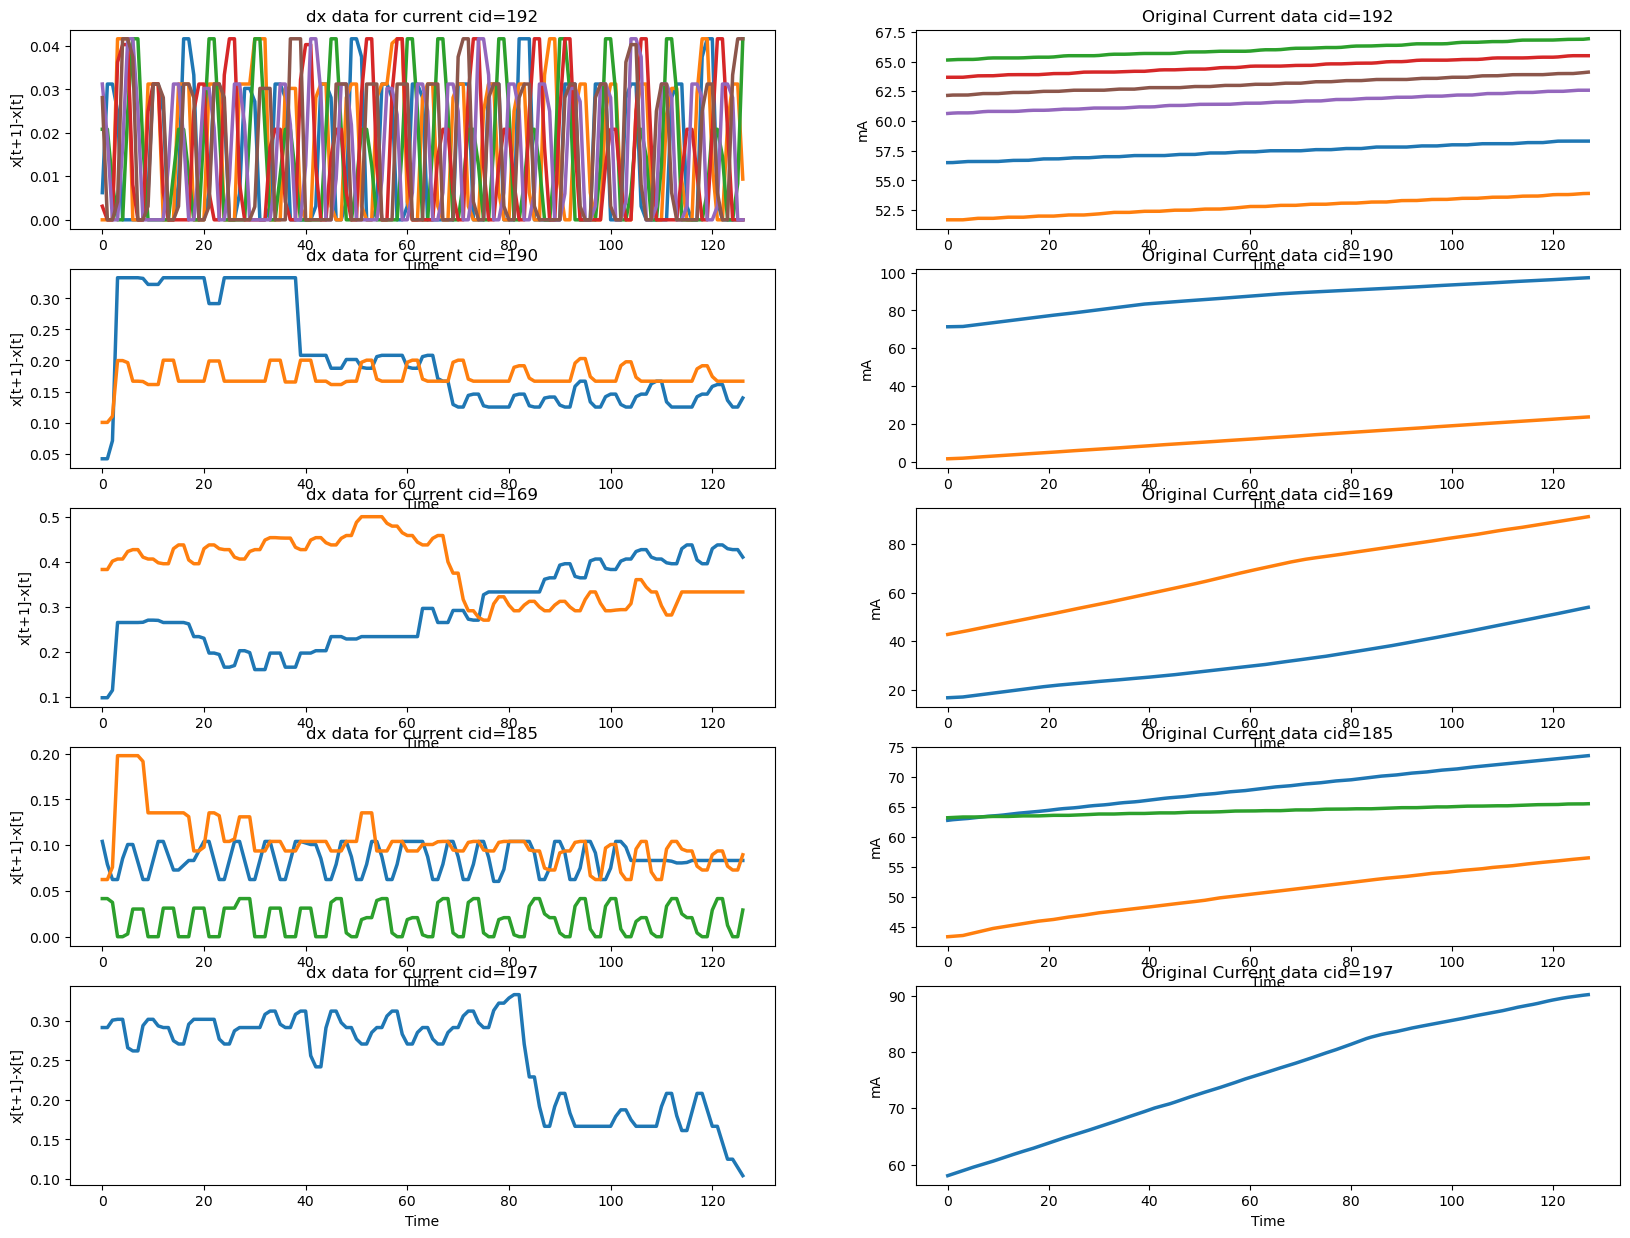

In [63]:
fig, axes = plt.subplots(len(current_dx.keys()),2,figsize=(20,15))
for i,cid in enumerate(current_dx.keys()):
    ax = axes[i][0]
    for k in range(len(current_dx[cid])):
        std = np.std(current_dx[cid][k])
        print(std)
        if(std > 0.015):
            ax.plot(current_dx[cid][k],lw=2.5)
    ax.set_title(f"dx data for current cid={cid}")
    ax.set_xlabel("Time")
    ax.set_ylabel("x[t+1]-x[t]")

    ax = axes[i][1]
    for k in range(len(current[cid])):
        std = np.std(current_dx[cid][k])
        # print(f"{cid} : {std}")
        if(std>0.015):
            ax.plot(current[cid][k],lw=2.5)
    ax.set_title(f"Original Current data cid={cid}")
    ax.set_xlabel("Time")
    ax.set_ylabel("mA")